# import the required Liberaries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Fetch Data

In [2]:
A = pd.read_csv("F:download/training_set.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A = A.drop(["Loan_ID"],axis=1)

In [5]:
A.shape

(614, 12)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [7]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
A["Gender"].fillna(A["Gender"].mode()[0],inplace=True)

In [10]:
A["Married"].fillna(A["Married"].mode()[0],inplace=True)
A["Dependents"].fillna(A["Dependents"].mode()[0],inplace=True)
A["Education"].fillna(A["Education"].mode()[0],inplace=True)
A["Self_Employed"].fillna(A["Self_Employed"].mode()[0],inplace=True)
A["Loan_Amount_Term"].fillna(A["Loan_Amount_Term"].mode()[0],inplace=True)
A["Credit_History"].fillna(A["Credit_History"].mode()[0],inplace=True)

In [11]:
A["ApplicantIncome"].fillna(A["ApplicantIncome"].mean(),inplace=True)
A["CoapplicantIncome"].fillna(A["CoapplicantIncome"].mean(),inplace=True)
A["LoanAmount"].fillna(A["LoanAmount"].mean(),inplace=True)

In [12]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Plot the Data
using matplotlib library

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

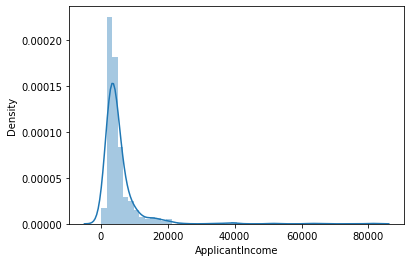

In [13]:
sb.distplot(A.ApplicantIncome)  # in Applicant Income their is skew using log funcaation from numpy we try remove skew

In [14]:
A.ApplicantIncome = np.log(A.ApplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

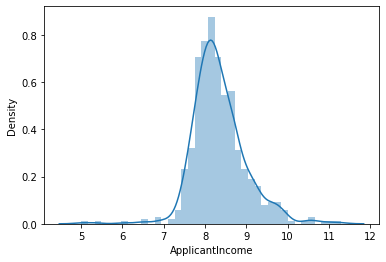

In [15]:
sb.distplot(A.ApplicantIncome)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

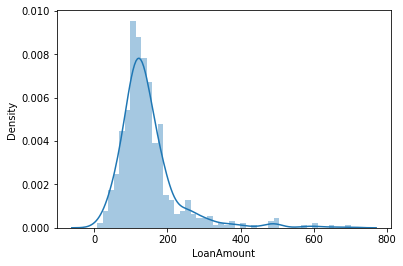

In [16]:
sb.distplot(A.LoanAmount)    # in loanAmount their is skew using log funcaation from numpy we try remove skew

In [17]:
A.LoanAmount = np.log(A.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

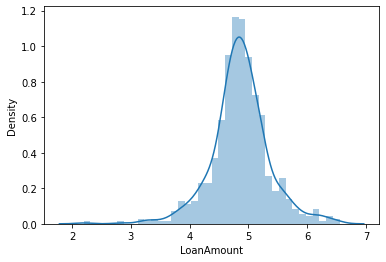

In [18]:
sb.distplot(A.LoanAmount)

# Plot Boxplot for checking their any outlier

<AxesSubplot:>

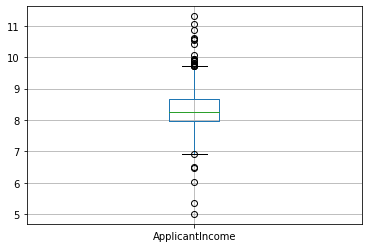

In [20]:
A.boxplot(["ApplicantIncome"])


<AxesSubplot:>

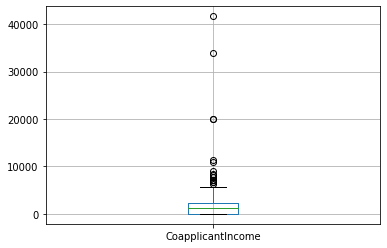

In [21]:
A.boxplot(["CoapplicantIncome"])

<AxesSubplot:>

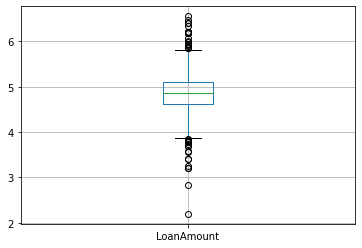

In [22]:
A.boxplot(["LoanAmount"])

# Remove the Outlier using IQR

In [23]:
Q1,Q3 = A.ApplicantIncome.quantile([0.25,0.75])
IQR = Q3-Q1
LL = Q1-1.5*IQR
UL = Q3+1.5*IQR

In [24]:
UL

9.714858994637867

In [25]:
df = A[A.ApplicantIncome > UL]

In [26]:
df.ApplicantIncome.count()

21

In [27]:
df.Loan_Status.value_counts()

Y    15
N     6
Name: Loan_Status, dtype: int64

In [28]:
A.ApplicantIncome = np.where(A.ApplicantIncome > UL, UL, A.ApplicantIncome)

<AxesSubplot:>

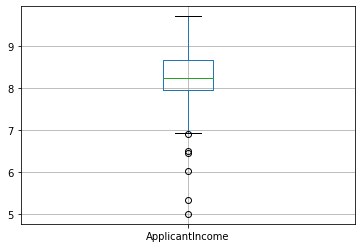

In [29]:
A.boxplot(["ApplicantIncome"])

In [30]:
Q10,Q30 = A.CoapplicantIncome.quantile([0.25,0.75])
IQR1 = Q30-Q10
LL1 = Q10-1.5*IQR1
UL1 = Q30+1.5*IQR1

In [31]:
UL1

5743.125

In [32]:
A[A.CoapplicantIncome > UL1].count()

Gender               18
Married              18
Dependents           18
Education            18
Self_Employed        18
ApplicantIncome      18
CoapplicantIncome    18
LoanAmount           18
Loan_Amount_Term     18
Credit_History       18
Property_Area        18
Loan_Status          18
dtype: int64

In [33]:
A.CoapplicantIncome = np.where(A.CoapplicantIncome > UL1, UL1, A.CoapplicantIncome)

<AxesSubplot:>

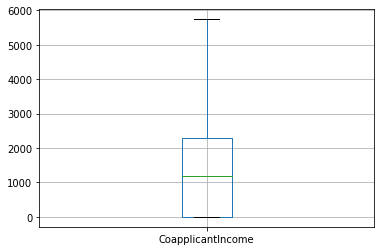

In [34]:
A.boxplot(["CoapplicantIncome"])

In [35]:
Q11,Q31 = A.LoanAmount.quantile([0.25,0.75])
IQR2 = Q31-Q11
LL2 = Q11-1.5*IQR2
UL2 = Q31+1.5*IQR2

In [36]:
UL2

5.849577627901635

In [37]:
A[A.LoanAmount > UL2].count()

Gender               21
Married              21
Dependents           21
Education            21
Self_Employed        21
ApplicantIncome      21
CoapplicantIncome    21
LoanAmount           21
Loan_Amount_Term     21
Credit_History       21
Property_Area        21
Loan_Status          21
dtype: int64

In [38]:
A.LoanAmount = np.where(A.LoanAmount > UL2, UL2, A.LoanAmount)

<AxesSubplot:>

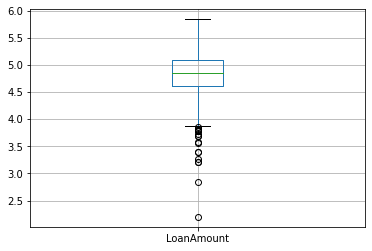

In [39]:
A.boxplot(["LoanAmount"])

# plot the categorical variable using countplot

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

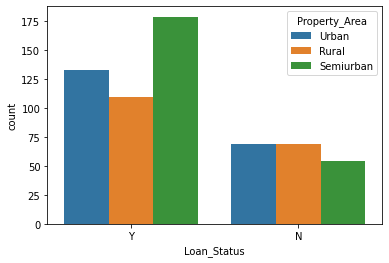

In [40]:
sb.countplot(A.Loan_Status,hue=A.Property_Area)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

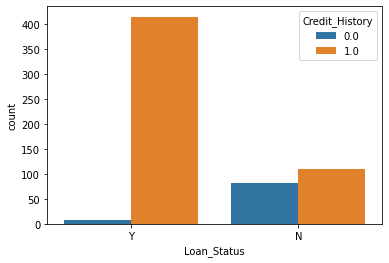

In [41]:
sb.countplot(A.Loan_Status,hue=A.Credit_History)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

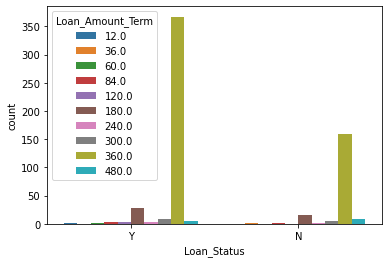

In [42]:
sb.countplot(A.Loan_Status,hue=A.Loan_Amount_Term)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

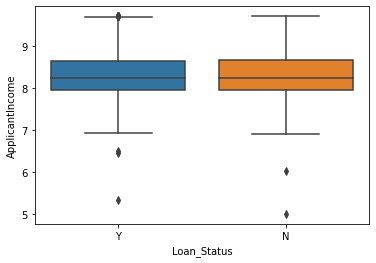

In [43]:
sb.boxplot(A.Loan_Status,A.ApplicantIncome)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

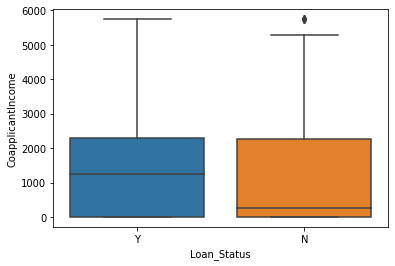

In [44]:
sb.boxplot(A.Loan_Status,A.CoapplicantIncome)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

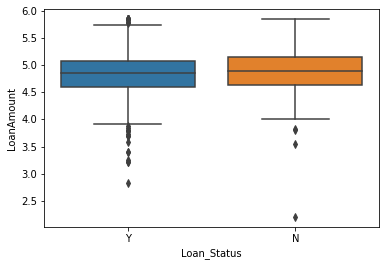

In [45]:
sb.boxplot(A.Loan_Status,A.LoanAmount)

# Define X and Y

In [46]:
Y = A[["Loan_Status"]]
X = A.drop(["Loan_Status"],axis=1)

In [47]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674026,0.0,4.986426,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.595180,1508.0,4.852030,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [49]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [50]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

# Data Preprocessing 
using one hot encoding for categorical and standardscaler for continous varibles

In [51]:
X1 = pd.get_dummies(X[cat])

In [52]:
X1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [54]:
Xnew = X2.join(X1)

In [55]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.578806,-0.874404,0.285078,0.273231,0.411733,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.447438,0.054617,-0.000133,0.273231,0.411733,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.533597,-0.874404,-1.405809,0.273231,0.411733,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.782951,0.578269,-0.137095,0.273231,0.411733,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.621273,-0.874404,0.205144,0.273231,0.411733,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# Create Logisctic Regression Model

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [57]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
model = lgr.fit(xtrain,ytrain)

In [58]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [60]:
tr_acc

0.8105906313645621

In [61]:
ts_acc

0.7967479674796748

In [62]:
confusion_matrix(ytrain,pred_tr)

array([[ 66,  88],
       [  5, 332]], dtype=int64)

In [63]:
confusion_matrix(ytest,pred_ts)

array([[20, 18],
       [ 7, 78]], dtype=int64)

# Create DecisionTree Classifier Model 

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model1 = dtc.fit(xtrain,ytrain)
predtr1 = model1.predict(xtrain)
predts1 = model1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

In [65]:
tr_acc1

1.0

In [66]:
ts_acc1

0.6829268292682927

# decision Tree Model has good training accuracy but give bad testing accuracy model is overfitted
so we use prunning to overcome this overfitting, for that we use "min samples leaf" Hyperparameter

In [67]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 34}

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=34)
model1 = dtc.fit(xtrain,ytrain)
predtr1 = model1.predict(xtrain)
predts1 = model1.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

In [69]:
tr_acc1

0.8065173116089613

In [70]:
ts_acc1

0.8211382113821138

# Create Random Forest classifier model

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 21)
model2 = rfc.fit(xtrain,ytrain)
predtr2 = model2.predict(xtrain)
predts2 = model2.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)

In [72]:
tr_acc2

1.0

In [73]:
ts_acc2

0.7642276422764228

# Random Forest Model has good training accuracy but give bad testing accuracy model is overfitted
#so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [74]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)
cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 65}

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=65,random_state = 21,min_samples_leaf=34)
model2 = rfc.fit(xtrain,ytrain)
predtr2 = model2.predict(xtrain)
predts2 = model2.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)

In [76]:
tr_acc2

0.7596741344195519

In [77]:
ts_acc2

0.7398373983739838

# Create Adaboost model

In [78]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model3 = abc.fit(xtrain,ytrain)
predtr3 = model3.predict(xtrain)
predts3 = model3.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc3 = accuracy_score(ytrain,predtr3)
ts_acc3 = accuracy_score(ytest,predts3)


In [79]:
tr_acc3

1.0

In [80]:
ts_acc3

0.6910569105691057

# Adaboost Model has good training accuracy but give bad testing accuracy model is overfitted
so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [81]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 99}

In [82]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,min_samples_leaf=34),n_estimators=99)
model3 = abc.fit(xtrain,ytrain)
predtr3 = model3.predict(xtrain)
predts3 = model3.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc3 = accuracy_score(ytrain,predtr3)
ts_acc3 = accuracy_score(ytest,predts3)

In [83]:
tr_acc3

0.9979633401221996

In [84]:
ts_acc3

0.7886178861788617

# Prepare test Data set

In [85]:
test_data = pd.read_csv("F:download/testing_set.csv")

In [86]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [87]:
test = test_data.drop(["Loan_ID"],axis=1)

In [88]:
test.isna().sum() # check any missing values in data set

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

replace missing values, if missing value is categorical then is mode and for continous use mean value

In [89]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].mean(),inplace=True)

In [90]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [91]:
cat1 = []
con1 = []
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat1.append(i)
    else:
        con1.append(i)

# Data Preprocessing on test Data set

In [92]:
X1 = pd.get_dummies(test[cat1]) #one hot encoding

In [93]:
X2 = pd.DataFrame(ss.fit_transform(test[con1]),columns=con1) #Standard Scaler for contionus features

In [94]:
Test = X2.join(X1)

In [95]:
Xnew.shape

(614, 20)

In [96]:
Test.shape # check the shape of test data is same as training data feed to model

(367, 20)

In [97]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [98]:
Test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

# 1st use Logisstic regression model for predication

In [99]:
pred_testdata = model.predict(Test)

In [100]:
Predication = test_data[["Loan_ID"]]

In [101]:
Predication["Loan_Status_predication"] = pred_testdata

In [102]:
Predication

,Loan_ID,Loan_Status_predication
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2nd use DecisionTree model for predication

In [103]:
pred_decisiontree = model1.predict(Test)

In [104]:
Predication['LoanStatus_DecisionTree'] = pred_decisiontree

In [105]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree
0,LP001015,Y,Y
1,LP001022,Y,Y
2,LP001031,Y,Y
3,LP001035,Y,Y
4,LP001051,Y,Y
...,...,...,...
362,LP002971,Y,Y
363,LP002975,Y,Y
364,LP002980,Y,Y
365,LP002986,Y,Y


#  3rd use random forest model for predication

In [106]:
pred_randomforest = model2.predict(Test)

In [107]:
Predication["LoanStatus_Randomforest"] = pred_randomforest

In [108]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree,LoanStatus_Randomforest
0,LP001015,Y,Y,Y
1,LP001022,Y,Y,Y
2,LP001031,Y,Y,Y
3,LP001035,Y,Y,Y
4,LP001051,Y,Y,Y
...,...,...,...,...
362,LP002971,Y,Y,Y
363,LP002975,Y,Y,Y
364,LP002980,Y,Y,Y
365,LP002986,Y,Y,Y


# Create ANN Model

Y column preprocessing
ANN model not take output column as categorical

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y),columns=Y.columns)

# Divide Data into Training and Testing set

In [110]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

# ANN Model

In [111]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [112]:
nn = Sequential()
nn.add(Dense(200,input_dim=20))
nn.add(Dense(200))
nn.add(Dropout(0.2))
nn.add(Dense(200))
nn.add(Dropout(0.2))
nn.add(Dense(200))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation="sigmoid"))

In [113]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
nn.fit(xtrain,ytrain,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 2s 7ms/step - loss: 0.5676 - accuracy: 0.7617
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7800
Epoch 3/1000
16/16 [==============================] - 0s 8ms/step - loss: 0.5079 - accuracy: 0.7902
Epoch 4/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.7943
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7963
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4762 - accuracy: 0.8045
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5090 - accuracy: 0.7963
Epoch 8/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4915 - accuracy: 0.7821
Epoch 9/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.4997 - accuracy: 0.7984
Epoch 10/1000
16/16 [==============================] - 0s 8ms/step - loss: 0.4889 - accuracy: 0.7923

# Make predication on test data set using ANN model

In [115]:
Q = []
for i in nn.predict(Test):
    if(i[0] < 0.5):
        Q.append(0)
    else:
        Q.append(1)

In [116]:
pred = le.inverse_transform(Q)

In [117]:
Predication["LoanStatus_ANN"] = pred

In [118]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_ANN
0,LP001015,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y
4,LP001051,Y,Y,Y,Y
...,...,...,...,...,...
362,LP002971,Y,Y,Y,Y
363,LP002975,Y,Y,Y,Y
364,LP002980,Y,Y,Y,Y
365,LP002986,Y,Y,Y,Y
